<a href="https://colab.research.google.com/github/bibekebib/X-ray-Healthy-Pneumonia-classification-tensorflow/blob/main/X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bibekchalise","key":"c490de08c1db7e82c7f0e9885082d925"}'}

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 25.4MB/s]
100% 2.29G/2.29G [00:29<00:00, 84.1MB/s]


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [9]:
!ls

chest-xray-pneumonia.zip  kaggle.json  sample_data


In [10]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [11]:

#@title # Importing libraries



In [17]:
test_path_normal = '/content/chest_xray/test/NORMAL/'
train_path_normal = '/content/chest_xray/train/NORMAL/'
val_path_normal = '/content/chest_xray/val/NORMAL/'
test_path_pneu = '/content/chest_xray/test/PNEUMONIA/'
train_path_pneu = '/content/chest_xray/train/PNEUMONIA/'
val_path_pneu = '/content/chest_xray/val/PNEUMONIA/'

In [34]:

train_normal_cases = glob.glob(train_path_normal+'*jpeg')
test_normal_cases = glob.glob(test_path_normal+'*jpeg')
val_normal_cases = glob.glob(val_path_normal+'*jpeg')
train_pneu_cases = glob.glob(train_path_pneu+'*jpeg')
test_pneu_cases = glob.glob(test_path_pneu+'*jpeg')
val_pneu_cases = glob.glob(val_path_pneu+'*jpeg')

In [20]:
train_normal_cases

['/content/chest_xray/train/NORMAL/NORMAL2-IM-1180-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1224-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0694-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0540-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0873-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0429-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0904-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0735-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0437-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0829-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1206-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0404-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0706-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1051-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0323-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0309-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0555-0001-

In [35]:
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
  train_list.append([x, 0])
for x in train_pneu_cases:
  train_list.append([x,1])
for x in test_normal_cases:
  test_list.append([x, 0])
for x in train_pneu_cases:
  test_list.append([x,1])
for x in val_normal_cases:
  val_list.append([x, 0])
for x in val_pneu_cases:
  val_list.append([x,1])

In [36]:
print(len(train_list))
print(len(test_list))
print(len(val_list))

5216
4109
16


In [37]:
import random
random.shuffle(train_list)
random.shuffle(test_list)
random.shuffle(val_list)

In [38]:
import pandas as pd
train_df = pd.DataFrame(train_list, columns = ['image', 'label'])
test_df = pd.DataFrame(test_list, columns = ['image', 'label'])
val_df = pd.DataFrame(val_list, columns = ['image', 'label'])

In [39]:
train_df.head()

,image,label
0,/content/chest_xray/train/NORMAL/IM-0487-0001....,0
1,/content/chest_xray/train/NORMAL/IM-0176-0001....,0
2,/content/chest_xray/train/PNEUMONIA/person657_...,1
3,/content/chest_xray/train/PNEUMONIA/person1020...,1
4,/content/chest_xray/train/PNEUMONIA/person356_...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


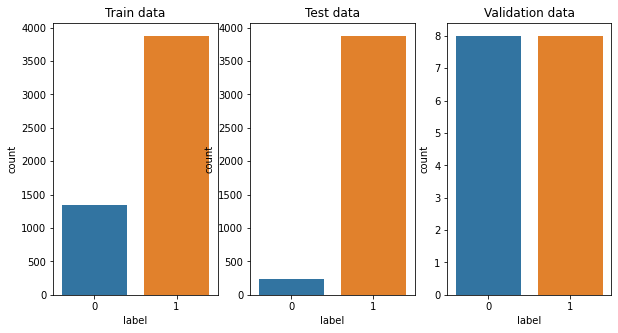

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(train_df['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['label'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['label'])
plt.title('Validation data')

plt.show()

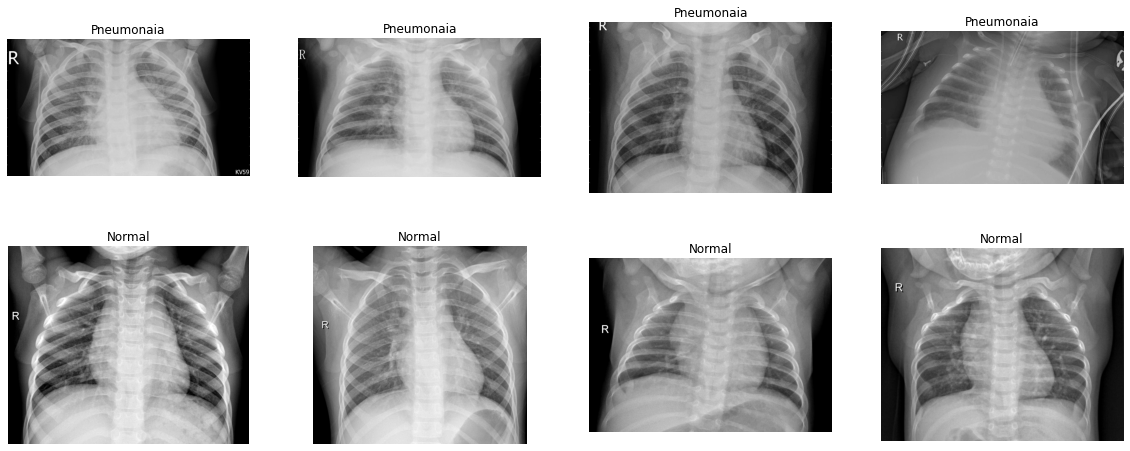

In [55]:
plt.figure(figsize=(20,8))
for i, img_path in enumerate(train_df[train_df['label']==1][0:4]['image']):
  plt.subplot(2,4, i+1)
  plt.axis('off')
  img = plt.imread(img_path)
  plt.imshow(img, cmap='gray')
  plt.title('Pneumonaia')

for i, img_path in enumerate(train_df[train_df['label']==0][0:4]['image']):
  plt.subplot(2,4, 4+i+1)
  plt.axis('off')
  img = plt.imread(img_path)
  plt.imshow(img, cmap='gray')
  plt.title('Normal')

In [59]:
def process_image(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (196,196))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = img/255.0
  img = np.reshape(img, (196,196,1))
  return img


def compose_dataset(df):
  data = []
  labels = []
  for img_path, label in df.values:
    data.append(process_image(img_path))
    labels.append(label)
  return np.array(data), np.array(labels)

In [60]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_Val, y_val = compose_dataset(val_df)

In [61]:
print('Train data shape: {} , labels shape {} '.format(X_train.shape, y_train.shape))
print('Test data shape: {} , labels shape {} '.format(X_test.shape, y_test.shape))
print('Validation data shape: {} , labels shape {} '.format(X_Val.shape, y_val.shape))

Train data shape: (5216, 196, 196, 1) , labels shape (5216,) 
Test data shape: (4109, 196, 196, 1) , labels shape (4109,) 
Validation data shape: (16, 196, 196, 1) , labels shape (16,) 


In [64]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

datagen.fit(X_train)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [67]:
y_val

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [73]:
model = keras.models.Sequential(
[    keras.layers.Conv2D(filters = 8, kernel_size = (7,7), padding='same', activation='relu', input_shape = (196,196,1)),
    keras.layers.Conv2D(filters=8, kernel_size =(7,7), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')]
)

optimizer = tf.keras.optimizers.Adam(lr= 0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callback = EarlyStopping(monitor='loss', patience=6)
history = model.fit(datagen.flow(X_train, y_train, batch_size=4), validation_data=(X_test, y_test), epochs=3, verbose=1, callbacks=[callback], class_weight={0:6.0, 1:0.5})

Epoch 1/3
1304/1304 [==============================] - 729s 559ms/step - loss: 0.2763 - accuracy: 0.8691 - val_loss: 0.4112 - val_accuracy: 0.8513
Epoch 2/3
1304/1304 [==============================] - 726s 557ms/step - loss: 0.2483 - accuracy: 0.8854 - val_loss: 0.2882 - val_accuracy: 0.8900
Epoch 3/3
1304/1304 [==============================] - 729s 559ms/step - loss: 0.2280 - accuracy: 0.8955 - val_loss: 0.2222 - val_accuracy: 0.9207


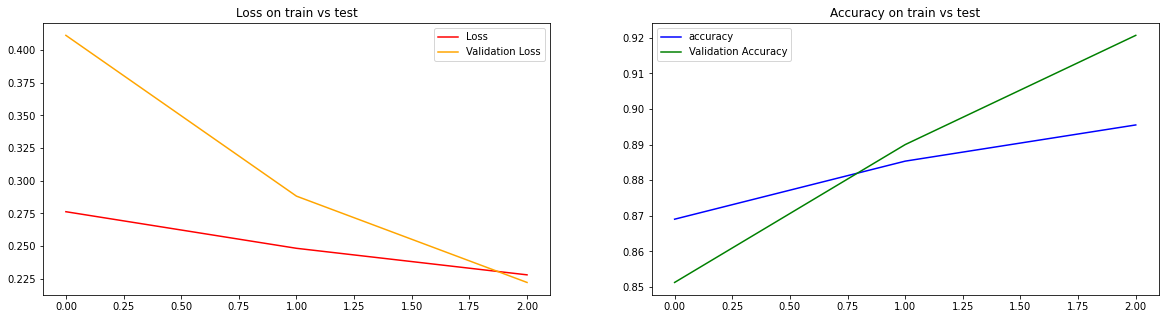

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')
plt.show()


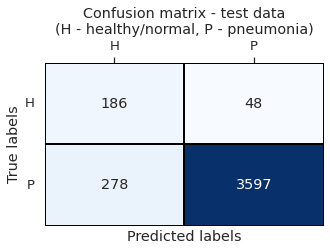

Classification report on test data
              precision    recall  f1-score   support

           0       0.40      0.79      0.53       234
           1       0.99      0.93      0.96      3875

    accuracy                           0.92      4109
   macro avg       0.69      0.86      0.74      4109
weighted avg       0.95      0.92      0.93      4109



In [78]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

In [79]:
y_val_hat = model.predict(X_Val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)

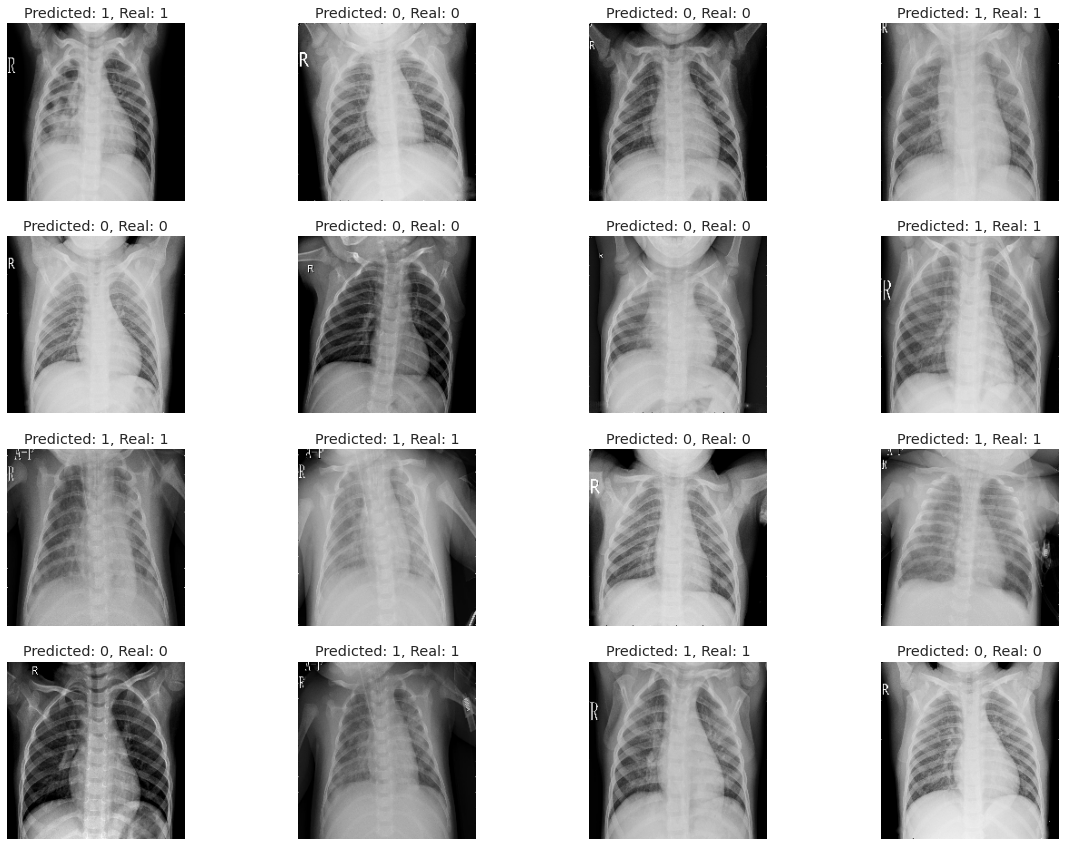

In [80]:
plt.figure(figsize=(20,15))
for i,x in enumerate(X_Val):
    plt.subplot(4,4,i+1)
    plt.imshow(x.reshape(196, 196), cmap='gray')
    plt.axis('off')
    plt.title('Predicted: {}, Real: {}'.format(y_val_hat[i], y_val[i]))  